# Shared genes phenotypes

###### First version 17/06/2022
###### Latest modif 29/11/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
#from pySankey.sankey import sankey
import imageio
from pandas.plotting import parallel_coordinates
from matplotlib.colors import LogNorm

DATE = datetime.now().strftime("%Y-%m-%d")

In [2]:
#p_value_min = 5.7  # -math.log10(0.05/len(x))
##directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/'

save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/'
type_phenots='main' # supplementary, main
if type_phenots=='main':
    ##### MAIN PHENOTYPES
    MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
    all_files = list(MAIN_LABELS.split(","))
    all_files_new = list(MAIN_NAMES.split(","))
    df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_main_vZekavat.csv')

elif type_phenots=='supplementary':
    #### SUPPLEMENTARY PHENOTYPES
    SUPPLEMENTARY_LABELS='tau1_all,tau1_artery,tau1_vein,ratio_AV_DF,tau2_all,tau2_artery,tau2_vein,tau4_all,tau4_artery,tau4_vein,D_std,D_A_std,D_V_std,D_CVMe,D_CVMe_A,D_CVMe_V,sd_mean_size,N_median_main_arteries,N_median_main_veins,arcLength_artery,arcLength_vein,bifurcations,VD_orig_all,VD_orig_artery,VD_orig_vein,ratio_VD,FD_all,FD_artery,FD_vein,mean_angle_taa,mean_angle_tva,eq_CRAE,eq_CRVE,median_CRAE,median_CRVE,CRAE,CRVE,ratio_CRAE_CRVE,ratio_median_CRAE_CRVE,ratio_standard_CRE,medianDiameter_all,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
    SUPPLEMENTARY_NAMES='tortuosity,A tortuosity,V tortuosity,ratio tortuosity,tortuosity2,A tortuosity2,V tortuosity2,tortuosity3,A tortuosity3,V tortuosity3,std diameter,A std diameter,V std diameter,CVMe diameter,A CVMe diameter,V CVMe diameter,std norm diameter,A num main,V num main,A arc length,V arc length,bifurcations,vascular density,A vascular density,V vascular density,ratio vascular density,fractal dimension,A fractal dimension,V fractal dimension,A temporal angle,V temporal angle,A central retinal eq,V central retinal eq,A main diameter,V main diameter,A central retinal eq2,V central retinal eq2,ratio central retinal eq,ratio main diameter,ratio central retinal eq2,median diameter,A median diameter,V median diameter,ratio median diameter'
    all_files = list(SUPPLEMENTARY_LABELS.split(","))
    all_files_new = list(SUPPLEMENTARY_NAMES.split(","))
    df_i=pd.read_csv('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/intersections_all_suplementary_vZekavat.csv')


fig_dir = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/figures/'
df_both=pd.read_csv(fig_dir +'both_main_vZekavat.csv', index_col=0)
df_values=pd.read_csv(fig_dir + 'intersections_main_vZekavat.csv', index_col=0)
df_names=pd.read_csv(fig_dir + 'intersections_genes_name_main_vZekavat.csv', index_col=0)


In [3]:
### which genes is in one but not in the other:

import pandas as pd

# Read the CSV file into a DataFrame
df_genes_look = df_i.copy()

# Filter the genes associated with 'tau1_artery' but not 'tau1_vein'
fitler_1 = 'ratio_CRAE_CRVE' #'ratio_AV_medianDiameter' #'ratio_AV_medianDiameter' #'tau1_artery'
fitler_2 = 'eq_CRAE' #'medianDiameter_artery' #'medianDiameter_artery' #'tau1_vein'
fitler_3 = 'eq_CRVE' #'medianDiameter_vein' #'medianDiameter_vein' #'tau1_artery'

filtered_df = df_genes_look[
    (df_genes_look['file_col'] == fitler_1) & 
    (~df_genes_look['gen'].isin(df_genes_look[df_genes_look['file_col'] == fitler_2]['gen'])) &
    (~df_genes_look['gen'].isin(df_genes_look[df_genes_look['file_col'] == fitler_3]['gen']))
]

# Print the resulting genes
print(filtered_df['gen'])


788       CUX2
855      MCF2L
935      NR5A2
986    FAM109A
Name: gen, dtype: object


In [4]:
df_pintar = df_values
#df_pintar.columns = list((df_names.columns))
#df_pintar.index = list((df_names.index))

#df_pintar= df_pintar.drop(columns=['Unnamed: 0'])
#df_pintar.index= df_pintar.columns
#df_pintar=df_pintar.astype(int)
#df_pintar=df_pintar.round(0) #.astype(int)
df_pintar.rename(columns=dict(zip(all_files, all_files_new)), inplace=True)
df_pintar.rename(index=dict(zip(all_files, all_files_new)), inplace=True)
#sns.set(style="white")
#print(df_pintar.columns)

np_upper = np.triu(df_pintar, k=+1)

#df = df1.fillna(df2)
mask = np.zeros_like(np_upper)
mask[np.triu_indices_from(mask, k=+1)] = True


sns.set(style="white")
cbar_by_default = False # False
plt.rcParams['font.size'] = '14'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
size_cbar_label = 12

if cbar_by_default== True:
    size_a=10
    size_b= 8
    fig, ax = plt.subplots(figsize=(size_a,size_b))
    #plt.subplots(figsize=(size_a,size_b))

    sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(),  mask=mask, cbar_kws={'label': 'number significant genes'}) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
    #plt.savefig(save_results+'/'+str(DATE)+'_half1_ventile'+str(num_ventile)+ '_heatmap_genes_intersection_'+ str(phenotypes_type)+'.pdf', edgecolor='none')
    plt.show()

elif cbar_by_default== 'otro':
    size_a=14.5
    size_b= 10
    fig, ax = plt.subplots(figsize=(size_a,size_b))
    sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
    fig.colorbar(ax.collections[0], ax=ax, location="left", use_gridspec=None, pad=0.2).set_label(label='number significant genes', size=size_cbar_label)
    plt.show()

else:
    print('no plot scatter')


no plot scatter


In [5]:
mapping_labels = dict(zip(all_files, all_files_new))
mapping_order = dict(zip(all_files_new, list(range(len(all_files_new)))))

In [6]:
df_i['gen'].value_counts().index

Index(['CTC-498M16.4', 'LINC00461', 'HERC2', 'C14orf39', 'OCA2', 'FLT1',
       'CTD-2568P8.1', 'FGF21', 'IZUMO1', 'AC079779.6',
       ...
       'TPX2', 'NR2F2', 'TCF19', 'GNG12', 'PAWR', 'DHRS7', 'ARL17B', 'STK25',
       'FBN1', 'RP11-9M16.2'],
      dtype='object', length=634)

In [7]:
N_head = 30
list_genes=list(df_i['gen'].value_counts().head(N_head).index)

In [8]:
df_reduc = df_i[df_i['gen'].isin(list_genes)]

df_reduc['file_col'] = df_reduc['file_col'].map(mapping_labels)
df_reduc['order']= df_reduc['file_col'].map(mapping_order)

df_reduc.sort_values(by='order', ascending=False, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

In [9]:
plot_shared_genes = False #True

if plot_shared_genes== True:
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    if type_phenots=='main':
        plt.figure(figsize=(10, 6))
        name_save='main_genes_phenotypes_scatterplots_25_11_2022.png'
    elif type_phenots=='supplementary':
        plt.figure(figsize=(15, 13))
        name_save='sup_genes_phenotypes_scatterplots_25_11_2022.png'
    #plt.xlabel('Genes') 
    #plt.ylabel('Phenotypes')

    plt.rcParams['font.size'] = '12'
    #plt.scatter(df_reduc['gen'], df_reduc['file_col'], cmap='Greens', c=df_reduc['-log10(p)'], s=1.5*df_reduc['-log10(p)'])
    plt.scatter(df_reduc['gen'], df_reduc['file_col'],  s=1.25*df_reduc['-log10(p)'])
    #cbar= plt.colorbar(fraction=0.1)
    #cbar.set_label('-log(p)')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    #plt.stem(df_reduc['gen'], df_reduc['file_col'],  basefmt = " ") #markerfmt='.',
    plt.xticks(df_reduc['gen'], rotation=45, ha='right')
    #plt.savefig('/SSD/home/sofia/' + name_save ,  transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=150)

else:
    print('continue')


continue


In [10]:
cbar_by_default = False

otra_aaa=False
if otra_aaa == True:
    sns.set(style="white")
    plt.rcParams['font.size'] = '14'
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['figure.constrained_layout.use'] = True
    size_cbar_label = 12

    figsize_val=(15, 8)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize_val, gridspec_kw={'width_ratios': [1.2, 1]})

    fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="YlGnBu", norm=LogNorm(), cbar=False, mask=mask, ax=ax1)
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    if cbar_by_default:
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)
    else:
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.03).set_label(label='N genes', size=size_cbar_label)

    fig2 = ax2.scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'])
    ax2.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.xticks(rotation=45, ha='right')

    plt.show()


    #plt.xlabel('Vascular IDPs')

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

cbar_by_default = False

if otra_aaa == True:
    sns.set(style="white")
    plt.rcParams['font.size'] = '12'
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['figure.constrained_layout.use'] = True
    size_cbar_label = 12


    figsize_val=(15, 8)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize_val, gridspec_kw={'width_ratios': [1.4, 1]}) # sharey=True, 

    #fig.tight_layout(pad=5.0)

    if cbar_by_default== True:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
        fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)

    else:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
        fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
        fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=None, pad=0.03).set_label(label='N genes', size=size_cbar_label)


    df_reduc = df_reduc.iloc[::-1] ## to reorder
    fig2 = plt.scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'])
    fig2 =  plt.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.xticks(rotation=45, ha='right')
    #plt.colorbar(label='-log(p)')
    #divider = make_axes_locatable(axes)
    #cax = divider.append_axes('right', size='2.5%', pad=0.2)
    #iax = inset_axes(cax, width='100%', height='75%', loc='center left', borderpad=0)
    #plt.colorbar(cax=iax, label='-log(p)') #, orientation='horizontal')
    #fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')
    #plt.xlabel('Vascular IDPs')

In [12]:
otra_imagen = False

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.colors import ListedColormap,LinearSegmentedColormap


### option1 # Create custom colormap that we call Magenta_c
import matplotlib.colors as colors
if otra_imagen==True:
    cdict = {'red':  ((0.0, 0.99, 0.99),  # low red at 0
                    (1.0, 0.6, 0.6)),   # high red at 1

            'green': ((0.0,  0.9, 0.9),    # high green at 0
                    #(0.5, 0.0, 0.0),    # all channels set to 0.0 at 0.5 to create black
                    (1.0, 0.0, 0.0)), # low green at 1

            'blue':  ((0.0, 0.99, 0.99),    # low blue at 0
                    # (0.5, 0.0, 0.0),    # all channels set to 0.0 at 0.5 to create black
                    (1.0, 0.7, 0.7))  # low blue at 1
        }

    Magenta_c = colors.LinearSegmentedColormap('Magenta_c', cdict)


    ### option2 


    cbar_by_default = False


    sns.set(style="white")
    plt.rcParams['font.size'] = '12'
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['figure.constrained_layout.use'] = True
    size_cbar_label = 12


    figsize_val=(14, 8)

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize_val, gridspec_kw={'width_ratios': [1.3, 1]}) # sharey=True, 

    #fig.tight_layout(pad=5.0)

    if cbar_by_default== True:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="Purples",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
        fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
        fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)

    else:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="Purples",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
        fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
        fig.colorbar(ax1.collections[0], ax=ax1, location="top", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)


    df_reduc = df_reduc.iloc[::-1] ## to reorder
    fig2 = plt.scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'], c='grey')
    fig2 =  plt.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.xticks(rotation=45, ha='right')

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import numpy as np

if otra_imagen==True:
    sns.set(style="white")
    plt.rcParams['font.size'] = '12'
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['figure.constrained_layout.use'] = True

    cbar_by_default = False  # Set the value of cbar_by_default
    # Define df_pintar and mask appropriately

    figsize_val = (13, 8)

    fig, ax = plt.subplots(1, 2, figsize=figsize_val, gridspec_kw={'width_ratios': [4, 3]})

    if cbar_by_default:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="Purples", norm=LogNorm(), cbar=False, mask=mask, ax=ax[0])
        fig1.set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
        cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="right", use_gridspec=None, pad=0.01, aspect=30)
        cbar.set_label(label='N genes', fontsize=12)
        cbar.ax.set_anchor((0.07, 0.5))

    else:
        fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="Purples", norm=LogNorm(), cbar=False, mask=mask, ax=ax[0])
        fig1.set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
        cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="top", use_gridspec=None, pad=0.01, aspect=30)
        cbar.set_label(label='N genes', fontsize=12)
        cbar.ax.set_anchor((0.07, 0.5))

    df_reduc = df_reduc.iloc[::-1]  # to reorder
    fig2 = ax[1].scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25 * df_reduc['-log10(p)'], c='grey')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    cmap_label = 'Pleiotropy (N trait pairs)'
    plt.xticks(rotation=45, ha='right')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    kw = dict(prop='sizes', num=4, color='grey', alpha=0.6)
    ax[1].legend(*fig2.legend_elements(**kw), loc='upper right', title='Mean -log10(p)', bbox_to_anchor=(1, 1.25),
                title_fontsize=12)

    plt.show()

        #fig.savefig('/SSD/home/sofia/28_03_2023_shared_genes.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)


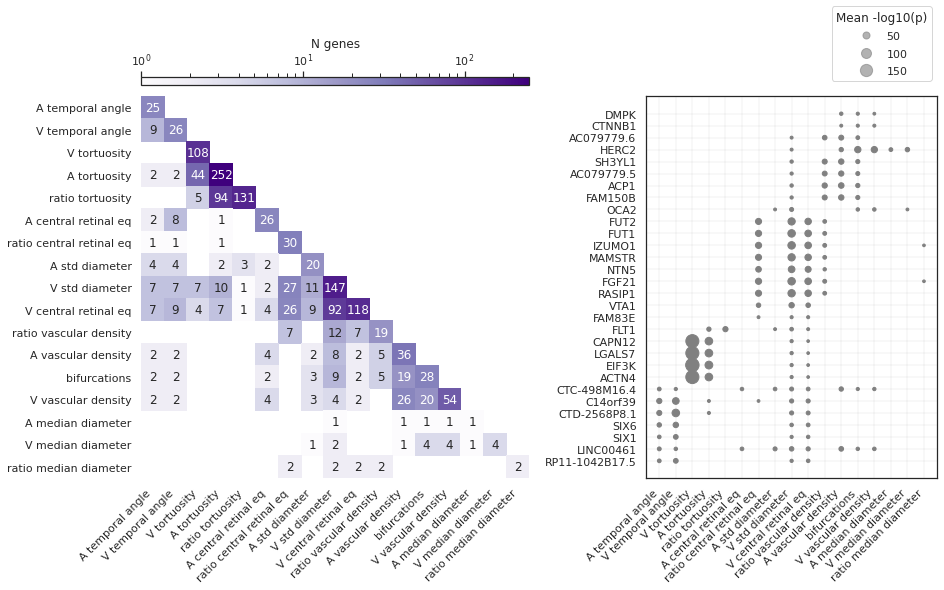

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import numpy as np

sns.set(style="white")
plt.rcParams['font.size'] = '12'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['figure.constrained_layout.use'] = True

cbar_by_default = False  # Set the value of cbar_by_default
# Define df_pintar and mask appropriately

figsize_val = (13,8)

fig, ax = plt.subplots(1, 2, figsize=figsize_val, gridspec_kw={'width_ratios': [4, 3]})

fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='', cmap="Purples", norm=LogNorm(), cbar=False, mask=mask, ax=ax[0])
fig1.set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
if cbar_by_default:
    cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="right", use_gridspec=None, pad=0.01, aspect=30)
else:
    cbar = fig.colorbar(ax[0].collections[0], ax=ax[0], location="top", use_gridspec=None, pad=0.01, aspect=30)
cbar.set_label(label='N genes', fontsize=12)
cbar.ax.set_anchor((0.07, 0.5))

df_reduc = df_reduc.iloc[::-1]  # to reorder
fig2 = ax[1].scatter(df_reduc['file_col'], df_reduc['gen'], s=1.25*df_reduc['-log10(p)'], c='grey')
plt.grid(color='gray', linestyle='-', linewidth=0.1)
cmap_label = 'Pleiotropy (N trait pairs)'
plt.xticks(rotation=45, ha='right')
kw = dict(prop='sizes', num=4, color='grey', alpha=0.6)
ax[1].legend(*fig2.legend_elements(**kw), loc='upper right', title='Mean -log10(p)', bbox_to_anchor=(1, 1.25), title_fontsize=12)

plt.show()
fig.savefig('/SSD/home/sofia/28_03_2023_shared_genes.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)





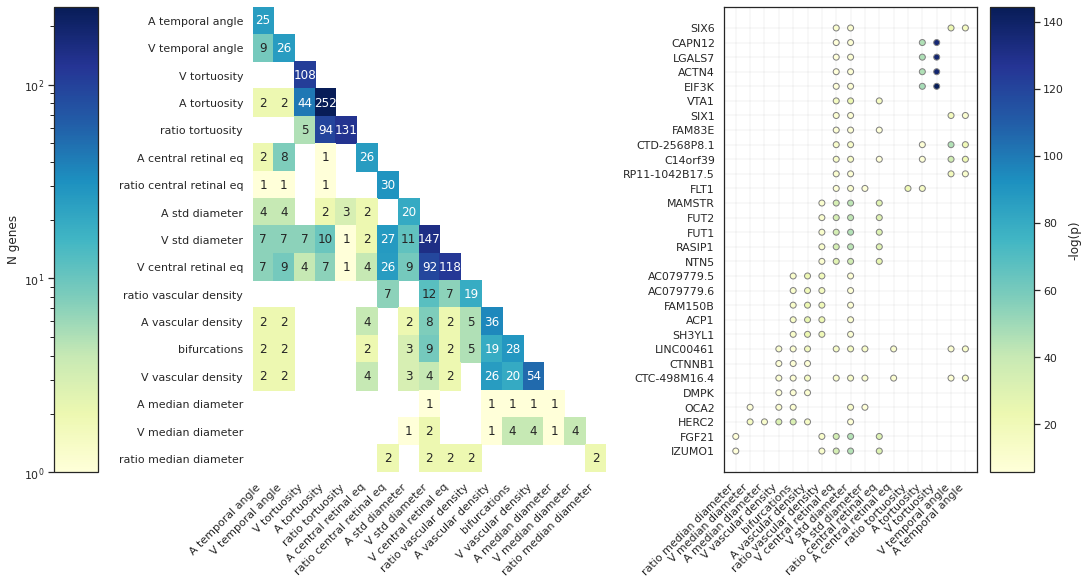

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

cbar_by_default = False

sns.set(style="white")
plt.rcParams['font.size'] = '12'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['figure.constrained_layout.use'] = True
size_cbar_label = 12


figsize_val=(15, 8)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=figsize_val, gridspec_kw={'width_ratios': [1.4, 1]}) # sharey=True, 

#fig.tight_layout(pad=5.0)

if cbar_by_default== True:
    fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
    fig.colorbar(ax1.collections[0], ax=ax1, location="right", use_gridspec=None, pad=0.02).set_label(label='N genes', size=size_cbar_label)

else:
    fig1 = sns.heatmap(df_pintar, annot=df_pintar, fmt='',  cmap="YlGnBu",  norm=LogNorm(), cbar=False, mask=mask, ax=ax1) 
    fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right')
    fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=None, pad=0.03).set_label(label='N genes', size=size_cbar_label)


df_reduc = df_reduc.iloc[::-1] ## to reorder
fig2 = plt.scatter(df_reduc['file_col'], df_reduc['gen'], c=df_reduc['-log10(p)'], cmap="YlGnBu", marker='o', edgecolors='gray') #s=1.25*df_reduc['-log10(p)'])
fig2 =  plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.xticks(rotation=45, ha='right')
plt.colorbar(label='-log(p)')
#divider = make_axes_locatable(axes)
#cax = divider.append_axes('right', size='2.5%', pad=0.2)
#iax = inset_axes(cax, width='100%', height='75%', loc='center left', borderpad=0)
#plt.colorbar(cax=iax, label='-log(p)') #, orientation='horizontal')
#fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')
#plt.xlabel('Vascular IDPs')

In [16]:
df_reduc

,Unnamed: 0,gen,p,file_col,-log10(p),order
1021,22077,IZUMO1,1.915875e-06,ratio median diameter,5.717633,16
998,22080,FGF21,1.651636e-06,ratio median diameter,5.782086,16
160,17536,HERC2,1.616344e-16,V median diameter,15.791466,15
798,17535,OCA2,4.043659e-07,V median diameter,6.393225,15
264,17802,HERC2,3.766210e-12,A median diameter,11.424096,14
...,...,...,...,...,...,...
117,16489,CTD-2568P8.1,3.205619e-21,A temporal angle,20.494088,0
165,17272,SIX6,3.140786e-16,A temporal angle,15.502962,0
318,17273,SIX1,3.317041e-11,A temporal angle,10.479249,0
252,6368,LINC00461,1.128042e-12,A temporal angle,11.947675,0
